In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
test = pd.read_csv("twitter_test.csv",header=None)

In [3]:
test.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
test.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)

In [5]:
test.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
print("Shape of the test Data : ",test.shape)

Shape of the test Data :  (74682, 4)


In [7]:
print("Number of Duplicate value in test Data : ",sum(test.duplicated()))

Number of Duplicate value in test Data :  2700


In [8]:
print("Number of the Null Value in Test data : \n",test.isna().sum())

Number of the Null Value in Test data : 
 Tweet_ID       0
Topic          0
Sentiment      0
Tweet        686
dtype: int64


In [9]:
test.dropna(axis=0,inplace=True)

In [10]:
print("After droping the null Value from Test data : \n",test.isna().sum())

After droping the null Value from Test data : 
 Tweet_ID     0
Topic        0
Sentiment    0
Tweet        0
dtype: int64


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


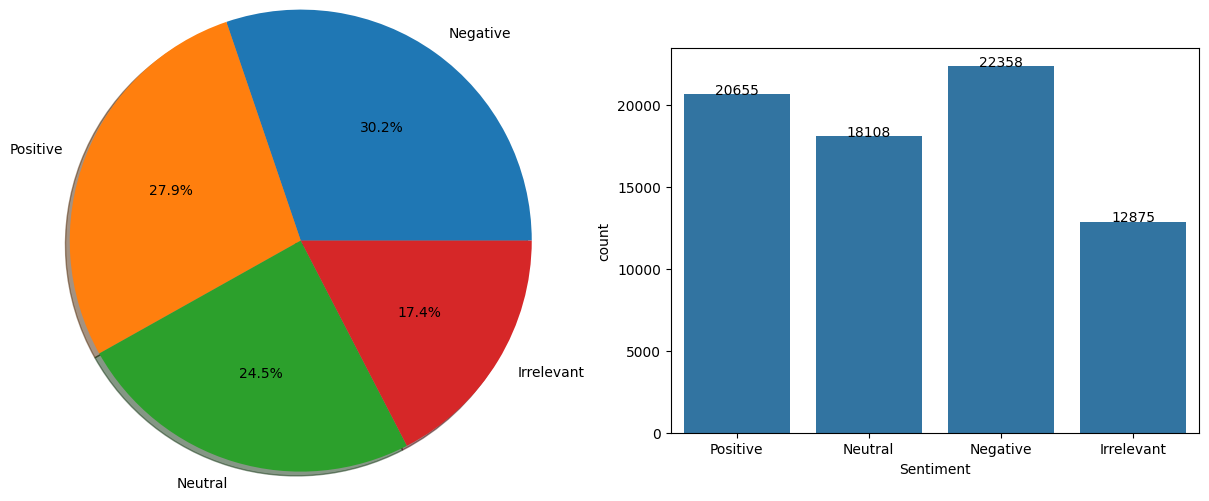

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
label = test['Sentiment'].value_counts().index
label_count = test['Sentiment'].value_counts().values
plt.pie(label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=test)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 0.2, ha='center', s=f'{height:.0f}')
plt.show()

In [13]:
test['Tweet_word_count']=test['Tweet'].apply(lambda x: len(x.split()))

In [14]:
test.head()

,Tweet_ID,Topic,Sentiment,Tweet,Tweet_word_count
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12


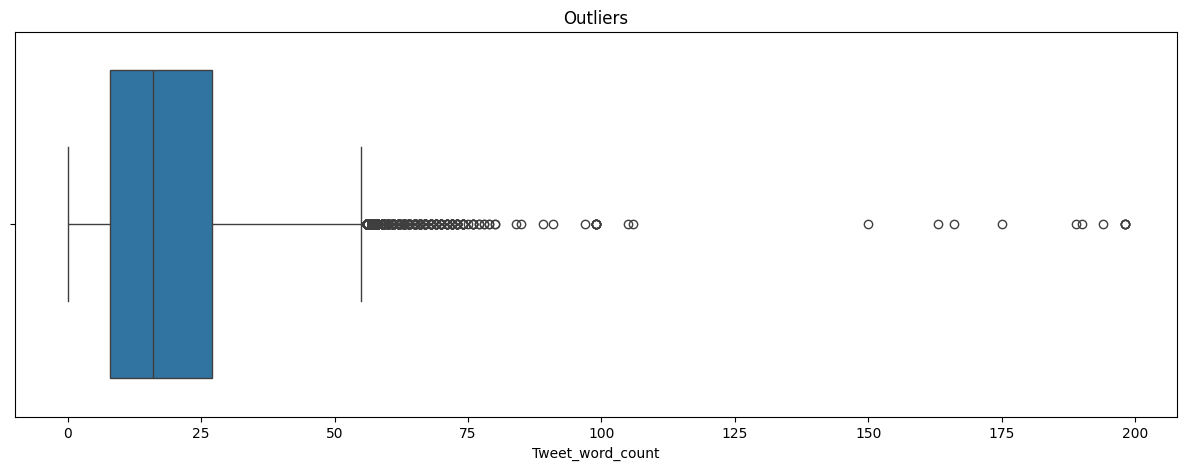

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Tweet_word_count',data = test)
plt.title('Outliers')
plt.show()

In [16]:
test['Tweet_word_count'] = test['Tweet'].apply(lambda x: len(str(x).split()))
Q1 = test["Tweet_word_count"].quantile(0.25)
Q3 = test["Tweet_word_count"].quantile(0.75)
IQR = Q3 - Q1
min_range = Q1 - 1.5 * IQR
max_range = Q3 + 1.5 * IQR
test["Tweet_word_count"] = test["Tweet_word_count"].apply(lambda x: min_range if x < min_range else (max_range if x > max_range else x))

In [17]:
test[['Tweet', 'Tweet_word_count']].head()

,Tweet,Tweet_word_count
0,im getting on borderlands and i will murder yo...,11.0
1,I am coming to the borders and I will kill you...,12.0
2,im getting on borderlands and i will kill you ...,10.0
3,im coming on borderlands and i will murder you...,10.0
4,im getting on borderlands 2 and i will murder ...,12.0


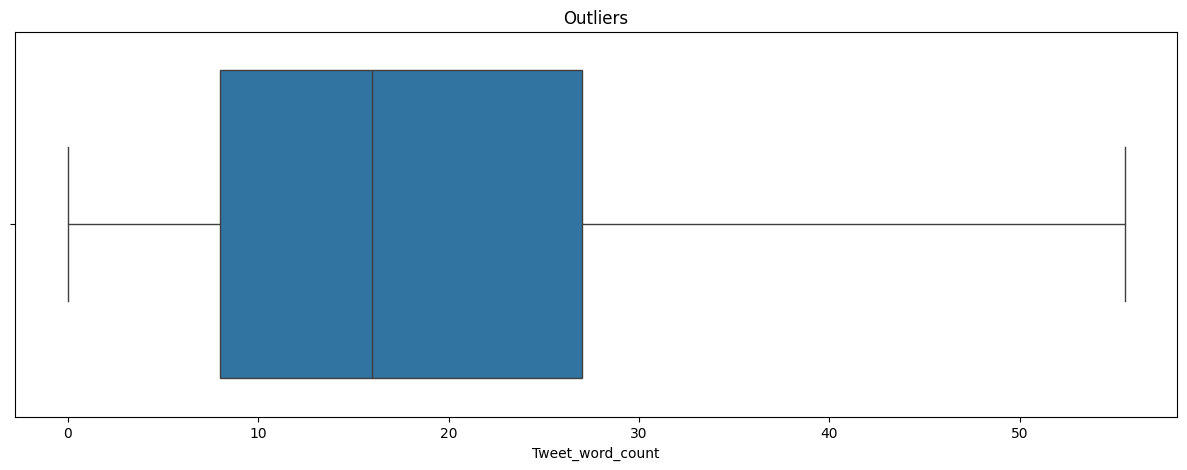

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Tweet_word_count',data = test)
plt.title('Outliers')
plt.show()

In [19]:
test.head()

,Tweet_ID,Topic,Sentiment,Tweet,Tweet_word_count
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11.0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12.0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10.0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10.0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12.0


In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [21]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [22]:
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    tweet = re.sub(r'#', '', tweet) 
    tweet = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in tweet.split(" ")]) 
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z ]', '', tweet)
    tweet = tweet.lower()
    words = tweet.split()
    return (" ".join(words)).strip()

In [23]:
def stopwords_lemmatization(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words]
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
    return lemmatized_sentence

In [24]:
def txt_conversion(sentence):
    sentence=re.sub(r'[^a-zA-Z ]','',sentence)
    sentence=sentence.lower()
    words=sentence.split()
    return (" ".join(words)).strip()

In [25]:
test['Tweet'] = test['Tweet'].apply(stopwords_lemmatization)

In [26]:
test.dropna(inplace=True)

In [27]:
test[test['Sentiment']=='Irrelevant'].head()

,Tweet_ID,Topic,Sentiment,Tweet,Tweet_word_count
102,2418,Borderlands,Irrelevant,Appreciate (sonic) concept / praxis Valenzuela...,34.0
103,2418,Borderlands,Irrelevant,Appreciate (sound) concept / practice Valenzue...,31.0
104,2418,Borderlands,Irrelevant,Evaluate (sound) concept / concept Valensela L...,31.0
105,2418,Borderlands,Irrelevant,Appreciate (sonic) concept / praxis Valenzuela...,32.0
106,2418,Borderlands,Irrelevant,Appreciate ( sonic ) electronic concept / prax...,46.0


In [28]:
oh_topic=pd.get_dummies(test['Topic'],drop_first=True)
test=pd.concat([test,oh_topic],axis=1)

In [29]:
test['Sentiment']=test['Sentiment'].map({'Negative':-1,'Positive':1,'Neutral':0,'Irrelevant':0})

In [30]:
test.drop(['Tweet_ID','Topic'],axis=1,inplace=True)

In [31]:
test = test.replace({False: 0, True: 1})

In [32]:
test.head()

,Sentiment,Tweet,Tweet_word_count,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,1,"im getting borderland murder ,",11.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"I coming border I kill all,",12.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"im getting borderland kill all,",10.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"im coming borderland murder all,",10.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"im getting borderland 2 murder all,",12.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[['Tweet_word_count']] = scaler.fit_transform(test[['Tweet_word_count']])
print("Normalised Data \n",test['Tweet_word_count'].head())

Normalised Data 
 0    0.198198
1    0.216216
2    0.180180
3    0.180180
4    0.216216
Name: Tweet_word_count, dtype: float64


In [34]:
test.to_csv('Twitter_train.csv')

## Model_Building

In [35]:
train = pd.read_csv("Twitter_train.csv",index_col='Unnamed: 0')

In [36]:
train.head()

,Sentiment,Tweet,Tweet_word_count,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,1,"im getting borderland murder ,",0.198198,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"I coming border I kill all,",0.216216,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"im getting borderland kill all,",0.180180,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"im coming borderland murder all,",0.180180,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"im getting borderland 2 murder all,",0.216216,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print("Shape of the train Data : ",train.shape)

Shape of the train Data :  (73996, 34)


In [38]:
print("Number of Duplicate value in train Data : ",sum(train.duplicated()))

Number of Duplicate value in train Data :  5198


In [39]:
print("Number of the Null Value in Train data : \n",train.isna().sum())

Number of the Null Value in Train data : 
 Sentiment                               0
Tweet                                1132
Tweet_word_count                        0
ApexLegends                             0
AssassinsCreed                          0
Battlefield                             0
Borderlands                             0
CS-GO                                   0
CallOfDuty                              0
CallOfDutyBlackopsColdWar               0
Cyberpunk2077                           0
Dota2                                   0
FIFA                                    0
Facebook                                0
Fortnite                                0
Google                                  0
GrandTheftAuto(GTA)                     0
Hearthstone                             0
HomeDepot                               0
LeagueOfLegends                         0
MaddenNFL                               0
Microsoft                               0
NBA2K                            

In [40]:
train.dropna(axis=0,how='any',inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = train['Tweet']
y = train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train

59582                                               I love
14956    2. 5K Best Bracket, Ranked Turbo | |! twitch! ...
19755                            I laughed real hard this.
68032                  This game gonna freaking super lit!
72381      Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
                               ...                        
38134    And I talk way way much shit playing Hearthsto...
6423     @PAYBACKIndia WooHoo!!!. <unk> awarded Amazon ...
56267                                                <unk>
881                            Holy shit borderland 3 ass.
16204    SUMAIL [ Enigma ] In Crazy Night New Meta 3 En...
Name: Tweet, Length: 58291, dtype: object

In [43]:
 X_test

69471    The people claim they're making game support d...
56731              It first time EU Commission taken step.
6157     @ HeatStroke202 Thank participating Summoners....
46516    Hey @verizonfios Ah @verizon Hey @VerizonSuppo...
25602    google gon without adobe flash LMAO i'm mad mf...
                               ...                        
58807    Just nice people life!.... GOLDEN BRIDE.NET. b...
66229                                                  Wow
47888    It would much morning @ HomeDepot... After 40 ...
25344    google "meet" video conferencing platform far ...
34179    spent 18 minute phone Nintendo support reimbur...
Name: Tweet, Length: 14573, dtype: object

In [44]:
 y_train

59582    1
14956    0
19755    1
68032    1
72381    0
        ..
38134    0
6423     1
56267    0
881     -1
16204    0
Name: Sentiment, Length: 58291, dtype: int64

In [45]:
y_test

69471    0
56731    0
6157     0
46516   -1
25602   -1
        ..
58807    0
66229    1
47888   -1
25344   -1
34179    0
Name: Sentiment, Length: 14573, dtype: int64

In [46]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test_tfidf)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.82      0.83      4456
           0       0.81      0.87      0.84      6090
           1       0.83      0.77      0.79      4027

    accuracy                           0.82     14573
   macro avg       0.82      0.82      0.82     14573
weighted avg       0.82      0.82      0.82     14573



In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

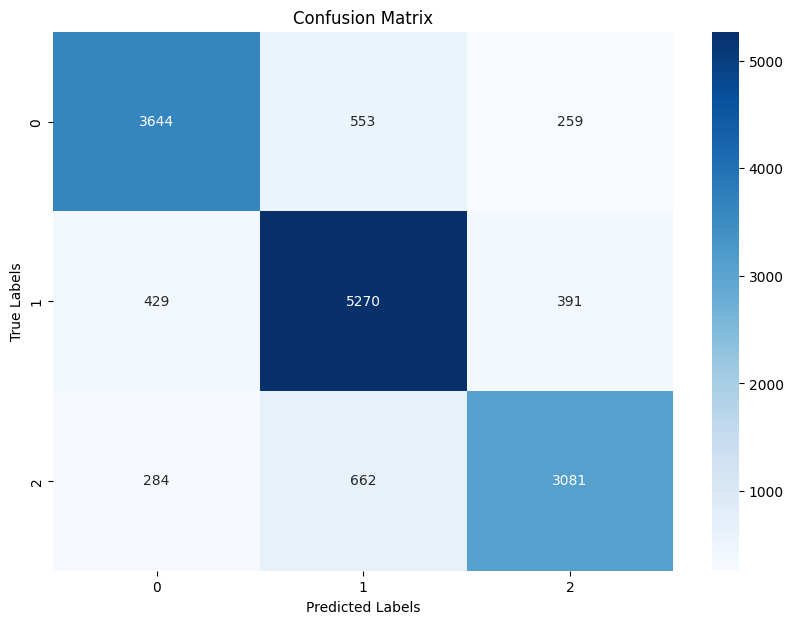

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()